In [49]:
import smooth_component_analysis as sca
from importlib import reload
reload(sca)
import numpy as np
import pandas as pd
import get_db_data as gdd

from scipy.stats import zscore
import matplotlib.pyplot as plt

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
sago = sca.savitzky_golay([1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
                          1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051],
                          21,11,2,3)

In [79]:
df = sago.get_aligned_signal_componets()

x range: 4.0 222.0


In [80]:
df.columns = pd.MultiIndex.from_tuples(df.columns)
df.columns

MultiIndex([(1001,   'Raw_101'),
            (1001,    'Sg_101'),
            (1001, 'resid_101'),
            (1001,   'rms_101'),
            (1001,  'rmso_101'),
            (1001,   'Raw_102'),
            (1001,    'Sg_102'),
            (1001, 'resid_102'),
            (1001,   'rms_102'),
            (1001,  'rmso_102'),
            ...
            (1051,   'Raw_255'),
            (1051,    'Sg_255'),
            (1051, 'resid_255'),
            (1051,   'rms_255'),
            (1051,  'rmso_255'),
            (1051,   'Raw_256'),
            (1051,    'Sg_256'),
            (1051, 'resid_256'),
            (1051,   'rms_256'),
            (1051,  'rmso_256')],
           length=300)

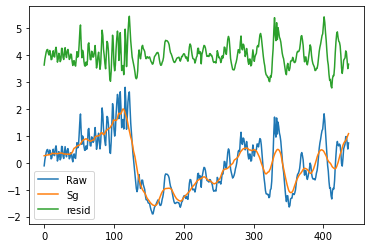

In [115]:
plt.plot(df[(1007,'Raw_120')])
plt.plot(df[(1007,'Sg_120')])
plt.plot(df[(1007,'resid_120')]+4)
plt.legend(['Raw','Sg','resid'])

In [81]:
cdf = df.corr()

In [82]:
cdf.columns.get_level_values(0).unique()

Int64Index([1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1042,
            1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051],
           dtype='int64')

In [83]:
def extract_corrs_by_signal_type(signal_type):
    group_ids = cdf.columns.get_level_values(0).unique()
    for gid in group_ids:
        group_view = cdf.loc[gid,gid]
        cols_for_group = group_view.columns.map(lambda x: x.startswith(signal_type))
        signal_type_view = group_view.loc[cols_for_group, cols_for_group]
        yield gid, np.array(sorted([signal_type_view.iloc[t] for t in [(0,1),(1,2),(0,2)]]))
        

In [84]:
n = extract_corrs_by_signal_type('Sg_')

In [85]:
sg_corrs = list(n)
sg_corrs

[(1001, array([-0.32211729, -0.03154686,  0.4353692 ])),
 (1004, array([0.17948199, 0.20420191, 0.37692789])),
 (1006, array([-0.04180492,  0.39435954,  0.57373525])),
 (1007, array([0.4766144 , 0.57184717, 0.78700994])),
 (1008, array([0.27447014, 0.37983317, 0.46136928])),
 (1009, array([-0.120595  ,  0.04097067,  0.10791164])),
 (1010, array([0.18769709, 0.42656402, 0.55953379])),
 (1011, array([0.04204737, 0.27282072, 0.52113083])),
 (1012, array([-0.17668781, -0.06391628, -0.05039922])),
 (1013, array([0.21428235, 0.25329971, 0.34356353])),
 (1042, array([-0.69368654, -0.49181106,  0.52312382])),
 (1043, array([-0.434928  ,  0.02346662,  0.56301079])),
 (1044, array([0.11020346, 0.20210308, 0.2478228 ])),
 (1045, array([0.20513025, 0.24455759, 0.34362383])),
 (1046, array([0.01338914, 0.05113049, 0.26956578])),
 (1047, array([-0.14614441,  0.18443866,  0.23683643])),
 (1048, array([-0.09541099, -0.00261335,  0.5028561 ])),
 (1049, array([-0.13887863,  0.11713151,  0.53594245])),
 

In [86]:
sg_corrs1 = np.vstack(s[1] for s in sg_corrs)
sg_corrs1

/home/siegman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


array([[-0.32211729, -0.03154686,  0.4353692 ],
       [ 0.17948199,  0.20420191,  0.37692789],
       [-0.04180492,  0.39435954,  0.57373525],
       [ 0.4766144 ,  0.57184717,  0.78700994],
       [ 0.27447014,  0.37983317,  0.46136928],
       [-0.120595  ,  0.04097067,  0.10791164],
       [ 0.18769709,  0.42656402,  0.55953379],
       [ 0.04204737,  0.27282072,  0.52113083],
       [-0.17668781, -0.06391628, -0.05039922],
       [ 0.21428235,  0.25329971,  0.34356353],
       [-0.69368654, -0.49181106,  0.52312382],
       [-0.434928  ,  0.02346662,  0.56301079],
       [ 0.11020346,  0.20210308,  0.2478228 ],
       [ 0.20513025,  0.24455759,  0.34362383],
       [ 0.01338914,  0.05113049,  0.26956578],
       [-0.14614441,  0.18443866,  0.23683643],
       [-0.09541099, -0.00261335,  0.5028561 ],
       [-0.13887863,  0.11713151,  0.53594245],
       [ 0.02989501,  0.23326987,  0.25557994],
       [ 0.18403896,  0.34199887,  0.54596671]])

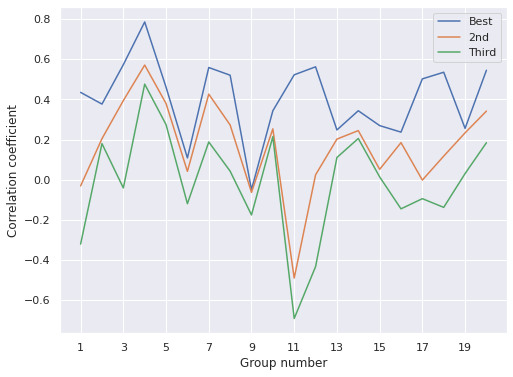

In [125]:
sns.set()
plt.figure(figsize=(8,6))
plt.plot(range(1,21),sg_corrs1[:,::-1])
plt.xlabel('Group number')
plt.ylabel('Correlation coefficient')
plt.legend(['Best','2nd','Third'])
plt.xticks(np.arange(1,21,2));

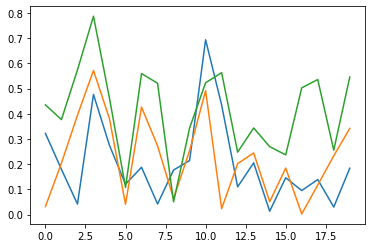

In [98]:
plt.plot(np.abs(sg_corrs1))

In [88]:
from scipy.stats import f_oneway

In [89]:
f_oneway(*[s[1] for s in sg_corrs]) 

F_onewayResult(statistic=1.479349212027454, pvalue=0.1463315680510201)

In [100]:
f_oneway(*[np.abs(s[1]) for s in sg_corrs]) 

F_onewayResult(statistic=2.029020052738382, pvalue=0.029658655602809066)

In [90]:
rmso_corrs = list(extract_corrs_by_signal_type('rmso_'))
rmso_corrs1 = np.vstack([s[1] for s in rmso_corrs])
rmso_corrs1

array([[ 0.25460468,  0.32852675,  0.35784929],
       [-0.05305009,  0.07836246,  0.18580997],
       [ 0.23773163,  0.32155969,  0.45328125],
       [-0.23528389, -0.1069963 ,  0.479591  ],
       [ 0.17556724,  0.43185497,  0.43688474],
       [-0.12657819,  0.06073861,  0.39892952],
       [-0.26526854, -0.01646957,  0.17177274],
       [-0.10326518,  0.04160358,  0.08827708],
       [-0.19113   , -0.18292733,  0.09408702],
       [-0.05065275,  0.13520389,  0.42765771],
       [ 0.18163522,  0.25297635,  0.27190048],
       [-0.17571834, -0.03710286,  0.34477722],
       [ 0.11546351,  0.48118682,  0.49098757],
       [-0.0230568 ,  0.23704937,  0.39515715],
       [ 0.31249055,  0.37977235,  0.52342975],
       [ 0.12333399,  0.23522407,  0.33378508],
       [-0.11173941, -0.04526729,  0.10407264],
       [-0.03470567,  0.1205464 ,  0.26992776],
       [-0.00935953,  0.06641417,  0.10193287],
       [ 0.21873075,  0.27622114,  0.50375128]])

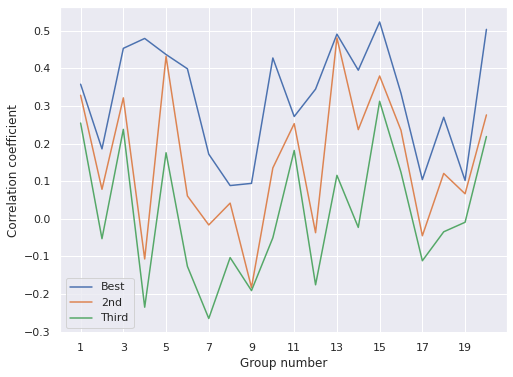

In [126]:
sns.set()
plt.figure(figsize=(8,6))
plt.plot(range(1,21),rmso_corrs1[:,::-1])
plt.xlabel('Group number')
plt.ylabel('Correlation coefficient')
plt.legend(['Best','2nd','Third'])
plt.xticks(np.arange(1,21,2));

In [92]:
f_oneway(*[r[1] for r in rmso_corrs]) 

F_onewayResult(statistic=2.1143015667073555, pvalue=0.023001379507769378)

In [93]:
sg_corrs2 = pd.DataFrame(data=sg_corrs1, columns='min_,mid_,max_'.split(','))
sg_corrs2 = sg_corrs2.sort_values('mid_',ignore_index=False)

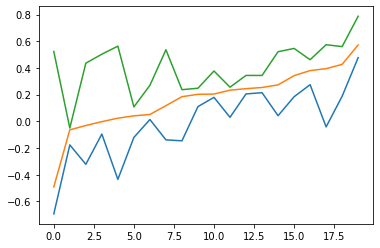

In [94]:
plt.plot(sg_corrs2.values)

In [95]:
resid_corrs = list(extract_corrs_by_signal_type('resid_'))
resid_corrs1 = np.vstack([s[1] for s in resid_corrs])
resid_corrs1

array([[ 0.06465437,  0.20206412,  0.24731573],
       [-0.05720888, -0.03616559,  0.04401823],
       [ 0.04557295,  0.09182292,  0.23674929],
       [-0.03745832, -0.00540419,  0.18217855],
       [ 0.10034227,  0.21816694,  0.31982207],
       [-0.2085063 , -0.07637747,  0.01421874],
       [ 0.09581676,  0.22284949,  0.26855569],
       [ 0.02679835,  0.16537665,  0.18156561],
       [-0.20968078, -0.07803846,  0.05343696],
       [ 0.08377723,  0.08382032,  0.17238469],
       [-0.11749053,  0.07295242,  0.12210044],
       [ 0.0255746 ,  0.10979373,  0.17178336],
       [ 0.16700851,  0.17023386,  0.37691584],
       [ 0.14273079,  0.19361056,  0.19762316],
       [-0.07284122,  0.00791232,  0.30331215],
       [ 0.09889458,  0.22577083,  0.23002578],
       [ 0.04221577,  0.13358754,  0.23452334],
       [ 0.02319389,  0.02327471,  0.16616764],
       [-0.05844789,  0.00715696,  0.04220935],
       [-0.06893588, -0.05660356,  0.08683515]])

In [96]:
f_oneway(*[r[1] for r in resid_corrs])  

F_onewayResult(statistic=2.710526114464559, pvalue=0.003926196785140774)

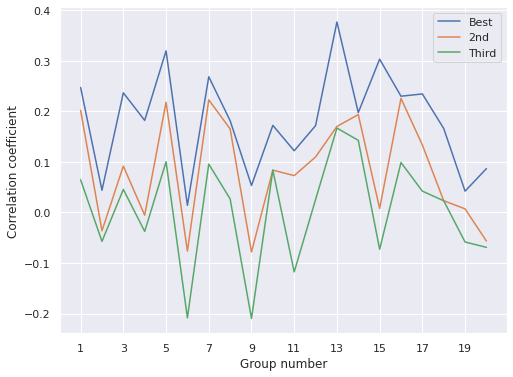

In [127]:
sns.set()
plt.figure(figsize=(8,6))
plt.plot(range(1,21),resid_corrs1[:,::-1])
plt.xlabel('Group number')
plt.ylabel('Correlation coefficient')
plt.legend(['Best','2nd','Third'])
plt.xticks(np.arange(1,21,2));

<AxesSubplot:>

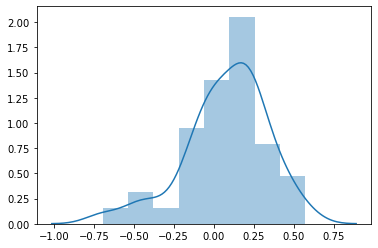

In [106]:
sns.distplot(sg_corrs1[:,:2].reshape(-1))

In [109]:
sg_corrs1[:,:2].reshape(-1).mean(), sg_corrs1[:,:2].reshape(-1).std()

(0.0774775655384882, 0.25974450514400144)

In [161]:
def corr_scatter_plot(group_corr_mat):
    x, y = group_corr_mat[:,1:].mean(axis=1), group_corr_mat[:,2]
    m, b = np.polyfit(x,y,1)
    xmin, xmax = x.min(), x.max()
    xrange, xmid = xmax-xmin, (xmax+xmin)/2
    xmin, xmax = xmid - xrange*0.6, xmid + xrange*0.6
    return x, y, np.array([xmin, xmax]), np.array([xmin, xmax])*m+b, "y={:.2f}x+{:.2f}".format(m,b)

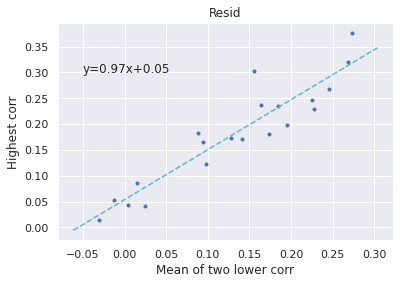

In [169]:
x,y,xl, yl, eq = corr_scatter_plot(resid_corrs1)
plt.plot(x,y,'.')
plt.plot(xl,yl,'c--')
plt.title('Resid')
plt.xlabel('Mean of two lower corr')
plt.ylabel('Highest corr')

plt.text(-0.05, 0.3, eq);


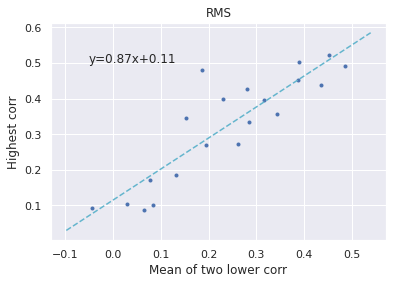

In [170]:
x,y,xl, yl, eq = corr_scatter_plot(rmso_corrs1)
plt.plot(x,y,'.')
plt.plot(xl,yl,'c--')

plt.title('RMS')
plt.xlabel('Mean of two lower corr')
plt.ylabel('Highest corr')


plt.text(-0.05, 0.5, eq);

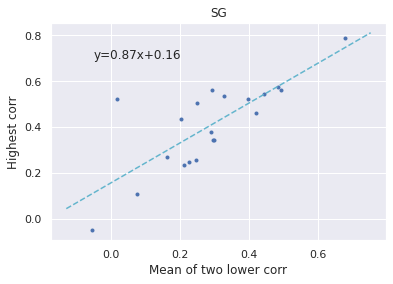

In [171]:
x,y,xl, yl, eq = corr_scatter_plot(sg_corrs1)
plt.plot(x,y,'.')
plt.plot(xl,yl,'c--')

plt.title('SG')
plt.xlabel('Mean of two lower corr')
plt.ylabel('Highest corr')


plt.text(-0.05, 0.7, eq);

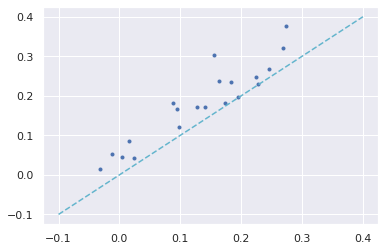

In [137]:
plt.plot(resid_corrs1[:,1:].mean(axis=1), resid_corrs1[:,2], '.')
plt.plot([-0.1, 0.4], [-0.1,0.4],'c--')


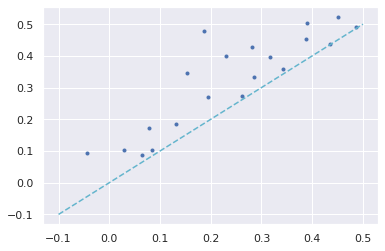

In [139]:
plt.plot(rmso_corrs1[:,1:].mean(axis=1), rmso_corrs1[:,2], '.')
plt.plot([-0.1, 0.5], [-0.1,0.5],'c--')


In [130]:
sg_corrs1[:,1:].mean(axis=1)

(array([ 0.20191117,  0.2905649 ,  0.48404739,  0.67942855,  0.42060123,
         0.07444115,  0.49304891,  0.39697577, -0.05715775,  0.29843162,
         0.01565638,  0.29323871,  0.22496294,  0.29409071,  0.16034813,
         0.21063755,  0.25012137,  0.32653698,  0.24442491,  0.44398279]),)

In [131]:
sg_corrs1[:,2]

array([ 0.4353692 ,  0.37692789,  0.57373525,  0.78700994,  0.46136928,
        0.10791164,  0.55953379,  0.52113083, -0.05039922,  0.34356353,
        0.52312382,  0.56301079,  0.2478228 ,  0.34362383,  0.26956578,
        0.23683643,  0.5028561 ,  0.53594245,  0.25557994,  0.54596671])